Load New Data

In [4]:
import pandas as pd
import numpy as np
import re
import random
from datetime import datetime

data = pd.read_csv('/Users/nurulizzati/Downloads/new_data.csv')
print(data.head())

                    role frequency_of_travel     primary_purpose  \
0  Undergraduate student               Daily  Commute to classes   
1  Undergraduate student   3 - 4 days a week  Commute to classes   
2  Undergraduate student   3 - 4 days a week  Commute to classes   
3  Undergraduate student   3 - 4 days a week  Commute to classes   
4  Undergraduate student   1 - 2 days a week  Commute to classes   

                                    travel_days  \
0  Monday, Tuesday, Wednesday, Thursday, Friday   
1                   Monday, Wednesday, Thursday   
2                   Monday, Wednesday, Thursday   
3    Monday, Thursday, Friday, Saturday, Sunday   
4                     Tuesday, Thursday, Friday   

                                        travel_hours ISB_Service  \
0  0900 - 1000, 1000 - 1100, 1100 - 1200, 1200 - ...          A2   
1  0900 - 1000, 1100 - 1200, 1300 - 1400, 1500 - ...          D2   
2  1700 - 1800, 1800 - 1900, 2100 - 2200, 2200 - ...          A2   
3  1100 - 12

NEW ONE W SYNTHESIZED DATA

Data Pre-processing, created an additional column for satisfaction level labels (dissatisfied, neutral, satisfied)

In [5]:
satisfaction_columns = ['frequency','punctuality','cleanliness','safety', 'coverage','crowdedness']

def overall_satisfaction(row):

    satisfied_count = 0
    dissatisfied_count = 0
    neutral_count = 0

    for col in satisfaction_columns:
        if row[col] == 4 or row[col] == 5:
            satisfied_count += 1
        elif row[col] == 1 or row[col] == 2:
            dissatisfied_count += 1
        elif row[col] == 3:
            neutral_count += 1
    
    if satisfied_count >= 4:
        return 'Satisfied'
    elif dissatisfied_count >= 4:
        return 'Dissatisfied'
    elif neutral_count >= 4:
        return 'Neutral'
    else:
        return 'Neutral'
    
  #apply this function to each row in data
data['Overall Satisfaction'] = data.apply(overall_satisfaction, axis=1)

# Print rows where 'Overall Satisfaction' is 'Dissatisfied'
#dissatisfied_rows = data[data['Overall Satisfaction'] == 'Dissatisfied']
print(data['Overall Satisfaction'])

            

0        Dissatisfied
1           Satisfied
2           Satisfied
3           Satisfied
4           Satisfied
             ...     
60235         Neutral
60236         Neutral
60237         Neutral
60238         Neutral
60239       Satisfied
Name: Overall Satisfaction, Length: 60240, dtype: object


In [5]:
neutral_rows = data[data['Overall Satisfaction'] == 'Dissatisfied']
print(neutral_rows)

                        role frequency_of_travel  \
0      Undergraduate student               Daily   
40     Undergraduate student   1 - 2 days a week   
160    Undergraduate student   3 - 4 days a week   
240    Undergraduate student               Daily   
280    Undergraduate student   1 - 2 days a week   
...                      ...                 ...   
59282  Undergraduate student   1 - 2 days a week   
59333  Undergraduate student   1 - 2 days a week   
59620  Undergraduate student   3 - 4 days a week   
59704  Undergraduate student   1 - 2 days a week   
59964               Visitor    1 - 2 days a week   

                                       primary_purpose  \
0                                   Commute to classes   
40                                  Commute to classes   
160                                 Commute to classes   
240                                 Commute to classes   
280    Accessing campus facilities (gym, library etc.)   
...                        

Adding in synthetic data to ensure that distribution of the 3 labels are balanced

In [6]:
import pandas as pd
import numpy as np

# Assuming your original DataFrame is named 'data'

# Function to generate a dissatisfied row
def generate_dissatisfied_row():
    # Choose random values for satisfaction columns, favoring 1s and 2s
    return {
        'frequency': np.random.choice([1, 2, 3, 4, 5], p=[0.4, 0.4, 0.1, 0.05, 0.05]),
        'punctuality': np.random.choice([1, 2, 3, 4, 5], p=[0.4, 0.4, 0.1, 0.05, 0.05]),
        'cleanliness': np.random.choice([1, 2, 3, 4, 5], p=[0.4, 0.4, 0.1, 0.05, 0.05]),
        'safety': np.random.choice([1, 2, 3, 4, 5], p=[0.4, 0.4, 0.1, 0.05, 0.05]),
        'coverage': np.random.choice([1, 2, 3, 4, 5], p=[0.4, 0.4, 0.1, 0.05, 0.05]),
        'crowdedness': np.random.choice([1, 2, 3, 4, 5], p=[0.4, 0.4, 0.1, 0.05, 0.05]),
    }

# Generate 2000 dissatisfied rows
new_dissatisfied_rows = pd.DataFrame([generate_dissatisfied_row() for _ in range(22000)])

# Combine the new rows with the existing data
data = pd.concat([data, new_dissatisfied_rows], ignore_index=True)

# Recalculate the overall satisfaction for the updated dataset
data['Overall Satisfaction'] = data.apply(overall_satisfaction, axis=1)

# Print the counts of each satisfaction label
print(data['Overall Satisfaction'].value_counts())


Overall Satisfaction
Satisfied       32665
Neutral         29268
Dissatisfied    20307
Name: count, dtype: int64


Decision Tree Model Training 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

#since we are trying to predict Overall Satisfaction, to encode it
data['Overall Satisfaction'] = LabelEncoder().fit_transform(data['Overall Satisfaction'])

#decide on feature set (X) and the target variable (y)

#X =  data.drop(columns=['frequency','punctuality','cleanliness','safety', 'coverage','crowdedness','Overall Satisfaction'])
X =  data.drop(columns=['Overall Satisfaction'])

Y = data['Overall Satisfaction']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 80/20 split for training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


#include more fake data for label 0

KeyboardInterrupt: 

Better model

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Encode target variable
data['Overall Satisfaction'] = LabelEncoder().fit_transform(data['Overall Satisfaction'])

# Feature set and target variable
X = data.drop(columns=['Overall Satisfaction'])
Y = data['Overall Satisfaction']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier with constraints
clf = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4038
           1       0.85      0.84      0.84      5931
           2       0.90      0.88      0.89      6479

    accuracy                           0.89     16448
   macro avg       0.89      0.90      0.89     16448
weighted avg       0.89      0.89      0.89     16448

Accuracy: 0.8883146887159533


Feature importance to check for top 3 factors

In [9]:

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})


# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

                                                 Feature  Importance
15                         prioritize_bus_route_coverage    0.549242
1                                            punctuality    0.107814
4                                               coverage    0.101912
3                                                 safety    0.092375
5                                            crowdedness    0.085112
...                                                  ...         ...
5019                                 time_start_13:02:21    0.000000
5020                                 time_start_13:02:23    0.000000
5021                                 time_start_13:02:27    0.000000
5022                                 time_start_13:02:29    0.000000
15034  seasonal_changes_Yes, service improves/worsens...    0.000000

[15035 rows x 2 columns]


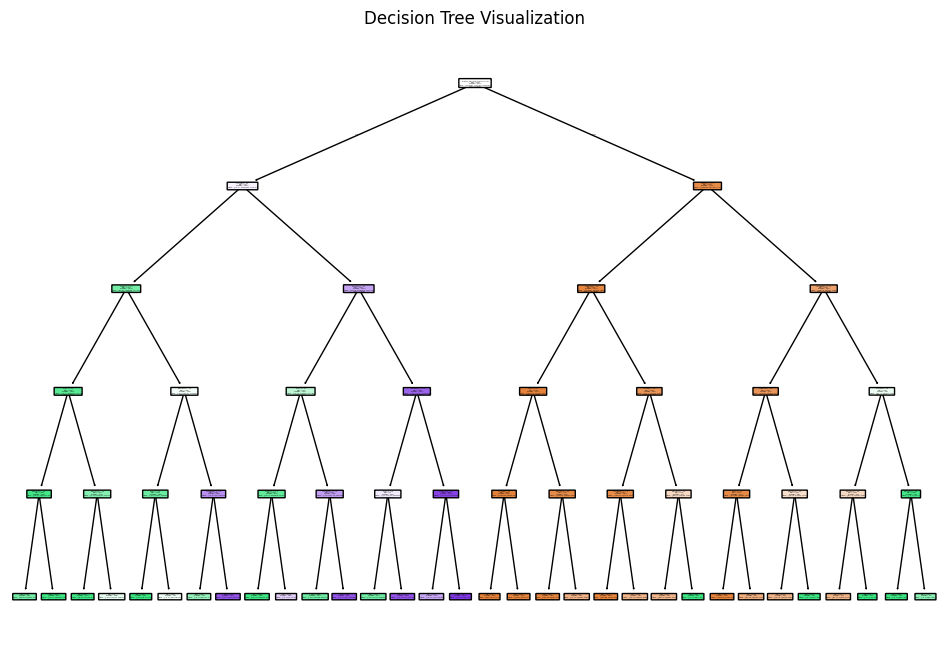

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#figure size
plt.figure(figsize=(12, 8))

#plot the decision tree
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Dissatisfied', 'Neutral', 'Satisfied'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Encode target variable
data['Overall Satisfaction'] = LabelEncoder().fit_transform(data['Overall Satisfaction'])

# Feature set and target variable
X = data.drop(columns=['Overall Satisfaction'])
Y = data['Overall Satisfaction']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier with constraints
clf = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Cross-validation scores
cv_scores = cross_val_score(clf, X, Y, cv=5)
print("Cross-validation scores:", cv_scores)


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4460
           1       0.85      0.83      0.84      5993
           2       0.90      0.87      0.88      6395

    accuracy                           0.88     16848
   macro avg       0.89      0.89      0.89     16848
weighted avg       0.88      0.88      0.88     16848

Accuracy: 0.8848528015194682
